# ЛР 6

# Feature engineering

Выполнил: Латыпов Альберт
 
Задание:
    Выбрать датасет, алгоритм классификации и построить модель
классификации. Затем при
помощи методов feature engineering (конструирование,
преобразование, отбор и т.д.) попытаться улучшить результат.

Описание датасета:
В выборке 891 объект. Каждый объект - пассажир титаника с набором описательных переменных:

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший)
Name — имя;
Sex — пол;
Age — возраст;
SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
Parch — количество родителей, детей (в том числе приемных) на борту титаника;
Ticket — номер билета;
Fare — плата за проезд;
Cabin — каюта;
Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

Целевая переменная Survived (1,0) - выжил ли человек в крушении или нет.

In [216]:
import pandas as pd
import numpy as np

In [217]:
df = pd.read_csv('C:/Users/Альберт/Desktop/ML/Урок 1/titanic(2).csv')

In [218]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [219]:
# Избавимся от имен, которые нам ничего не говорят:
df.drop(columns=['Name'],inplace=True)

In [220]:
df.shape

(891, 11)

In [221]:
# Сделаем то, что сразу приходит на ум: заменим male/female  в колонке 'sex' на 0/1:
df['Sex'].replace(to_replace='male', value=1, inplace=True)
df['Sex'].replace(to_replace='female', value=0, inplace=True)

In [222]:
# смотрим по столбцам сколько есть пропущенных значений:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [223]:
#Удалим колонку Cabin, т.к. слишком много пропущенных значений, а так же Ticket где многие зачения уникальны:
df.drop(columns=['Ticket','Cabin'],inplace=True)

In [224]:
np.where(df['Embarked'].isnull())

(array([ 61, 829], dtype=int64),)

In [225]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [226]:
# в Age заполним все пустые строки средним значением:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy='mean')
my_imputer.fit(df[['Age']])
df['Age']=my_imputer.transform(df[['Age']])

In [227]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [228]:
# удалим две строчки, где в кол. Embarked пропущены значения
df.dropna(inplace=True)

In [229]:
df['Embarked1'],df['Embarked2'],df['Embarked3'] = 0,0,0

In [230]:
# заменим Embarked вектором признаков:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc.fit(df[['Embarked']])
df[['Embarked1','Embarked2','Embarked3']] = enc.transform(df[['Embarked']])

In [231]:
df.drop(columns=['PassengerId','Embarked'], inplace=True)

In [232]:
#Финальный датафрейм:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [233]:
y = df['Survived']
X = df.drop(columns=['Survived'])

In [234]:
#from sklearn.model_selection import train_test_split
#X_tr, X_ts, y_tr, y_ts = train_test_split( X,y, test_size=0.3 )

In [235]:
# Обучим DecisionTreeClassifier со стандартными параметрами:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)
np.mean(cross_val_score(clf, X, y, cv=5))


0.7750650669713707

In [236]:
# Получили уже довольно хорошее значение точности на кросс-валидации.
# Попытаемся еще улучшить этот результат.
# Для этого, для начала, маштабируем переменные, что я забыл сделать в начале:

In [317]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [238]:
# Обучим DecisionTreeClassifier со стандартными параметрами:
clf = DecisionTreeClassifier(random_state=0)
np.mean(cross_val_score(clf, scaler.fit_transform(X), y, cv=5))

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.7761886624769886

In [239]:
# Как видим, ситуацию это практически не улучшило.

# У нас есть две очевидно зависимые переменные: 
# SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника; 
# Parch — количество родителей, детей (в том числе приемных) на борту титаника
# Добавим колонку family, в которую запишем результат суммы этих двух, для каждого объекта
# И еще добавим индикаторную переменную is_alone, в ней значение 1 означает что пассажир ехал один,
# 0 - у пасажира был по крайней мере 1 родственник на борту.

In [240]:
df['family'] = df['SibSp'] + df['Parch']

In [241]:
df['is_alone'] = df['family'] == 0

In [246]:
# вот, что получилось:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3,family,is_alone
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,1,False
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,1,False
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0,True
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,1,False
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,0,True


In [243]:
y = df['Survived']
X = df.drop(columns=['Survived'])

In [258]:
clf = DecisionTreeClassifier(random_state=0)
np.mean(cross_val_score(clf, scaler.fit_transform(X), y, cv=5))

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.7638037199263633

In [ ]:
# Видим, что это ситуацию тоже не улучшило.

{'whiskers': [<matplotlib.lines.Line2D at 0x21c33e10>,
 'caps': [<matplotlib.lines.Line2D at 0x21c3c4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21c339e8>],
 'medians': [<matplotlib.lines.Line2D at 0x21c3cb70>],
 'fliers': [<matplotlib.lines.Line2D at 0x21c3ceb8>],
 'means': []}

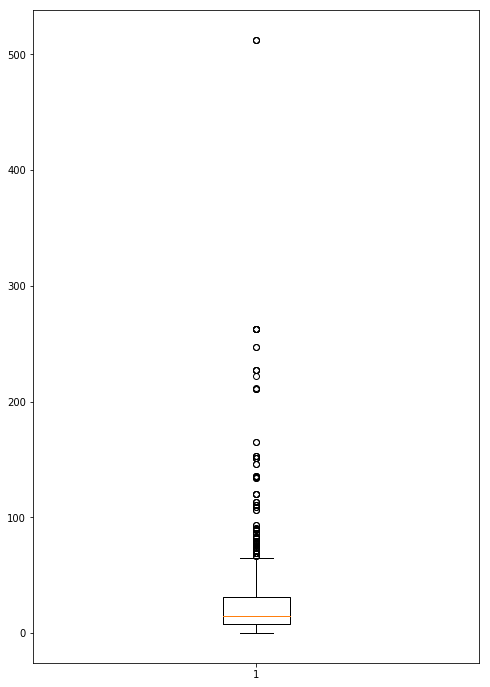

In [272]:
# Изучим выбросы цен билетов (Fare):
import matplotlib.pyplot as plt
plt.figure(figsize=(8,12))
plt.boxplot(df['Fare'])

In [302]:
#Видно, что цены четко делятся на группы, добавим категориальный признак Fare_Category, сгруппировав по промежуткам:
df['Fare_Category'] = pd.cut(df['Fare'], bins=[-10,7.90,14.45,31.28,120,100000000000], labels=[1, 2, 3, 4, 5])

In [309]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked1,Embarked2,Embarked3,family,is_alone,Fare_Category
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,1,False,1
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,1,False,4
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0,True,2
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,1,False,4
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,0,True,2


In [312]:
# Удалим Fare и посмотрим на результат:
y = df['Survived']
X = df.drop(columns=['Survived','Fare'])

In [315]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked1,Embarked2,Embarked3,family,is_alone,Fare_Category
0,3,1,22.0,1,0,0.0,0.0,1.0,1,False,1
1,1,0,38.0,1,0,1.0,0.0,0.0,1,False,4
2,3,0,26.0,0,0,0.0,0.0,1.0,0,True,2
3,1,0,35.0,1,0,0.0,0.0,1.0,1,False,4
4,3,1,35.0,0,0,0.0,0.0,1.0,0,True,2


In [321]:
#Финальная точность:
clf = DecisionTreeClassifier(random_state=0)
np.mean(cross_val_score(clf, X, y, cv=5))

0.7874373135275821

In [ ]:
# Результат немного улучшился

Вывод: Исследуемый датасет содержал в себе много сложностей, с которыми пришлось бороться. Пришлось избавиться от некоторых переменных, например 'Cabin', который содержал в себе много пропущ. значений, 'Ticket' который никак не интерпретируется.
    Выкинул несколько NaN строк и заменил NaN в "Age" на среднее значение по столбцу. Пришлось искать зависимости в переменных, и создавать новые. Как результат - улучшение точности классификатора на 1-2%.